# DICE 2013R (Rocky Road flavour)

This notebook compares DICE.jl to the `DICE2013_032813.gms` GAMS file and Includes directory.

In [1]:
# For Solving #
using DICE;

# For Comparing with GAMS data
using NBInclude;
@nbinclude("../GAMS/GAMS_Compare.ipynb")

# For Additional Plots
using Plots

version = v2013R(RockyRoad)

v2013R (Rocky Road flavour)

## Base Price Scenario

Similar to the Vanilla version of 2013R, a base and optimal price scenario exist.

We will quickly compare them, as they should mimic the Vanilla version.

In [2]:
base = solve(BasePrice, version)

This is Ipopt version 3.13.0, running with linear solver ma97.

Number of nonzeros in equality constraint Jacobian...:     3914
Number of nonzeros in inequality constraint Jacobian.:      176
Number of nonzeros in Lagrangian Hessian.............:      944

Total number of variables............................:     1545
                     variables with only lower bounds:      536
                variables with lower and upper bounds:      179
                     variables with only upper bounds:       59
Total number of equality constraints.................:     1374
Total number of inequality constraints...............:       59
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       59

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -0.0000000e+00 9.00e+03 1.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0

Num

Base (current policy) carbon price scenario using v2013R (Rocky Road flavour).
A JuMP Model
Maximization problem with:
Variables: 1561
Objective function type: JuMP.VariableRef
`JuMP.GenericAffExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 655 constraints
`JuMP.GenericQuadExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 240 constraints
`JuMP.VariableRef`-in-`MathOptInterface.EqualTo{Float64}`: 16 constraints
`JuMP.VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 715 constraints
`JuMP.VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 298 constraints
Nonlinear: 538 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Ipopt
Names registered in the model: C, CCA, CEMUTOTPER, CPC, CPRICE, DAMAGES, E, Eind, FORC, I, K, MCABATE, Mᵤₚ, Mₐₜ, Mₗₒ, PERIODU, RI, S, Tₐₜ, Tₗₒ, UTILITY, Y, YGROSS, YNET, Λ, Ω, μ

In [3]:
params = loadGAMSResults(version, BasePrice);

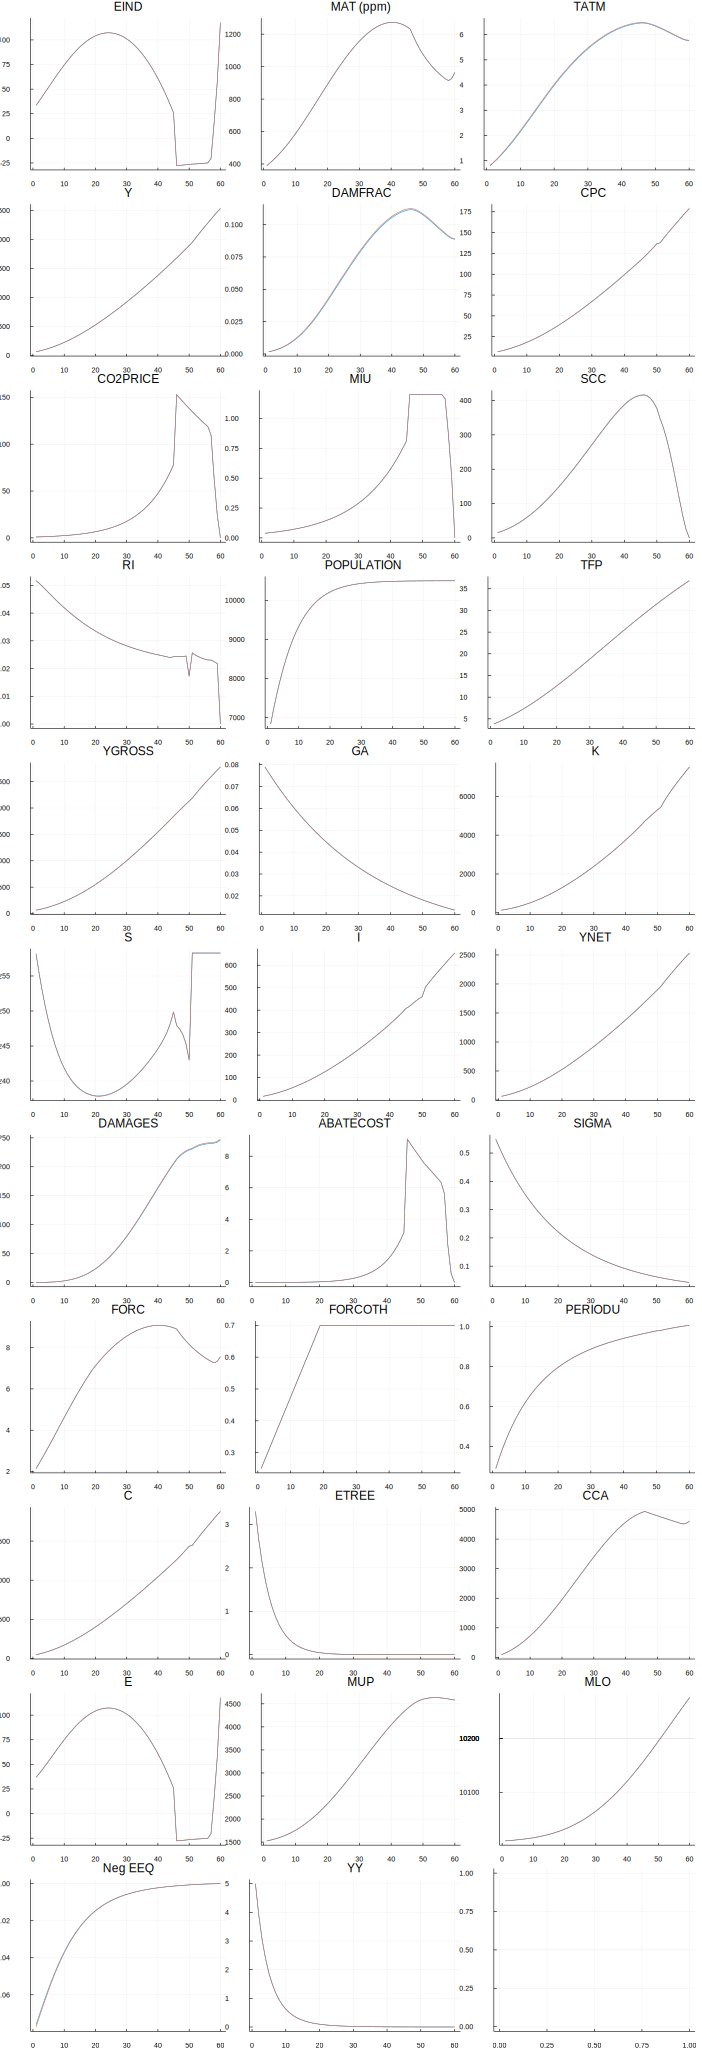

In [4]:
plotComparison(base, params)

CONOPT Utility = `2668.2118865871`

In [5]:
base.results.UTILITY

2669.801699625273

# Optimal Price Scenario

In [6]:
opt = solve(OptimalPrice, version)

This is Ipopt version 3.13.0, running with linear solver ma97.

Number of nonzeros in equality constraint Jacobian...:     3914
Number of nonzeros in inequality constraint Jacobian.:      176
Number of nonzeros in Lagrangian Hessian.............:      944

Total number of variables............................:     1545
                     variables with only lower bounds:      595
                variables with lower and upper bounds:      120
                     variables with only upper bounds:       59
Total number of equality constraints.................:     1374
Total number of inequality constraints...............:       59
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       59

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -0.0000000e+00 9.00e+03 1.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
 250

Optimal carbon price scenario using v2013R (Rocky Road flavour).
A JuMP Model
Maximization problem with:
Variables: 1561
Objective function type: JuMP.VariableRef
`JuMP.GenericAffExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 655 constraints
`JuMP.GenericQuadExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 240 constraints
`JuMP.VariableRef`-in-`MathOptInterface.EqualTo{Float64}`: 16 constraints
`JuMP.VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 715 constraints
`JuMP.VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 298 constraints
Nonlinear: 538 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Ipopt
Names registered in the model: C, CCA, CEMUTOTPER, CPC, CPRICE, DAMAGES, E, Eind, FORC, I, K, MCABATE, Mᵤₚ, Mₐₜ, Mₗₒ, PERIODU, RI, S, Tₐₜ, Tₗₒ, UTILITY, Y, YGROSS, YNET, Λ, Ω, μ

In [7]:
oparams = loadGAMSResults(version, OptimalPrice);

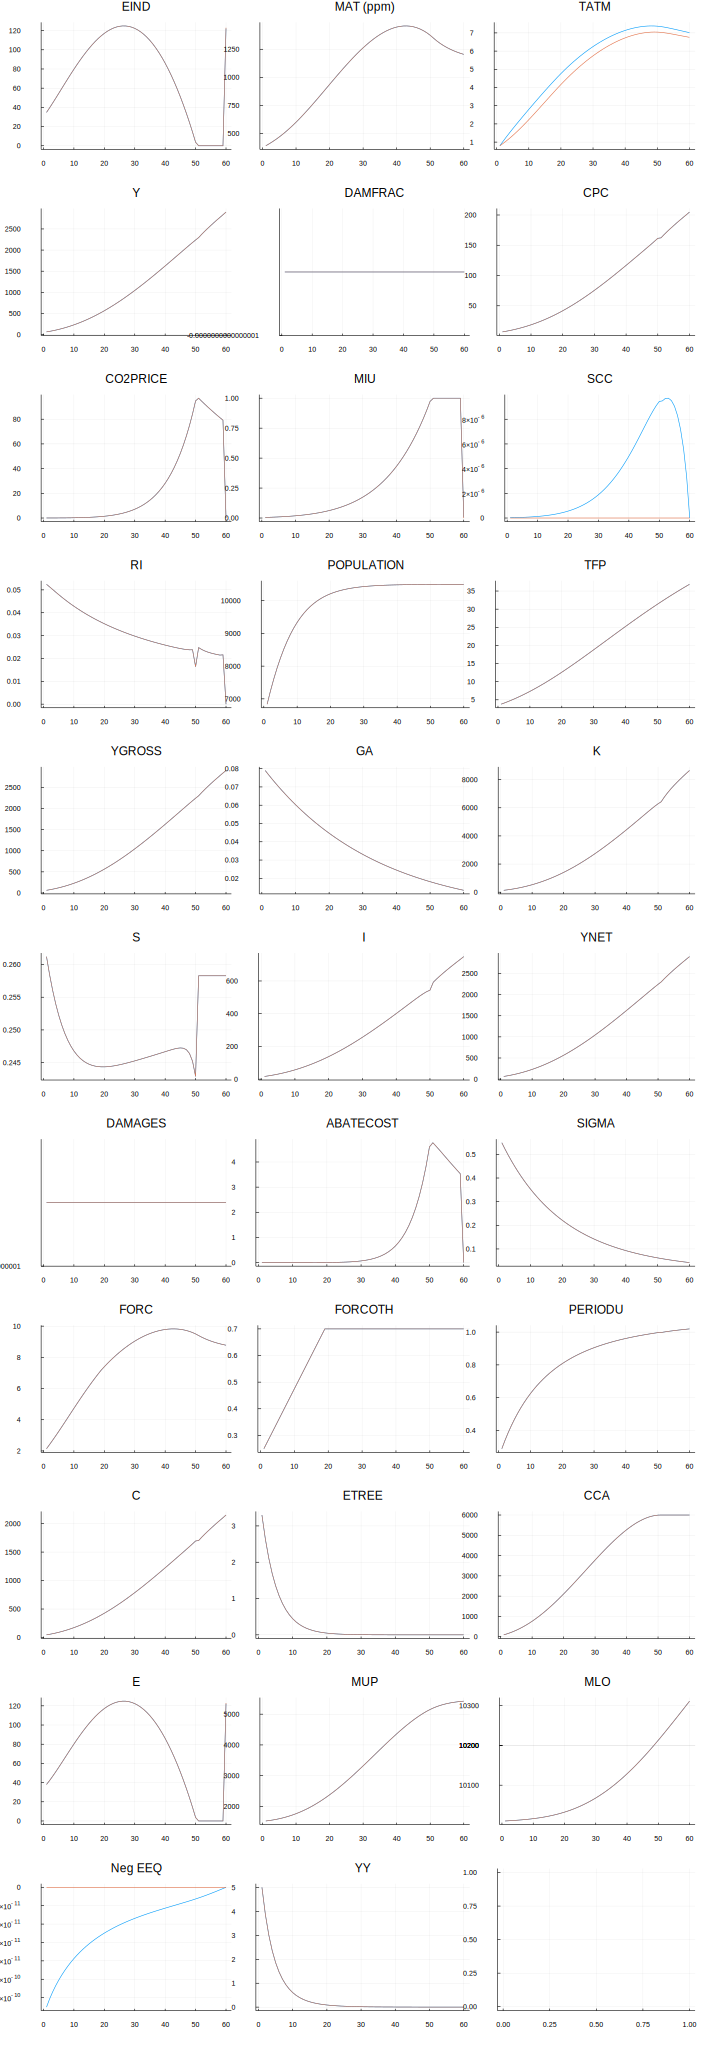

In [8]:
plotComparison(opt, oparams)

We see that in the GAMS version, our SCC is zero&mdash;whereas the DICE.jl version has some small value. This comes about from precision difference: GAMS is using 32bit floats, DICE.jl is using 64bit ones. In addition to this, results are truncated to ten decimals and don't use scientific notation.


CONOPT Utility = `2741.2318406380`

In [9]:
opt.results.UTILITY

2741.231840517804

# Limit 2 Degrees Scenario

From here, we are getting into the more unique scenarios of the Rocky Road version, but their analysis needs to be no different.

In [10]:
lim2 = solve(Limit2Degrees, version)

This is Ipopt version 3.13.0, running with linear solver ma97.

Number of nonzeros in equality constraint Jacobian...:     3914
Number of nonzeros in inequality constraint Jacobian.:      176
Number of nonzeros in Lagrangian Hessian.............:      944

Total number of variables............................:     1545
                     variables with only lower bounds:      536
                variables with lower and upper bounds:      179
                     variables with only upper bounds:       59
Total number of equality constraints.................:     1374
Total number of inequality constraints...............:       59
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       59

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -0.0000000e+00 9.00e+03 1.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
 250

Limit warming to 2° with damages scenario using v2013R (Rocky Road flavour).
A JuMP Model
Maximization problem with:
Variables: 1561
Objective function type: JuMP.VariableRef
`JuMP.GenericAffExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 655 constraints
`JuMP.GenericQuadExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 240 constraints
`JuMP.VariableRef`-in-`MathOptInterface.EqualTo{Float64}`: 16 constraints
`JuMP.VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 715 constraints
`JuMP.VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 298 constraints
Nonlinear: 538 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Ipopt
Names registered in the model: C, CCA, CEMUTOTPER, CPC, CPRICE, DAMAGES, E, Eind, FORC, I, K, MCABATE, Mᵤₚ, Mₐₜ, Mₗₒ, PERIODU, RI, S, Tₐₜ, Tₗₒ, UTILITY, Y, YGROSS, YNET, Λ, Ω, μ

In [11]:
l2params = loadGAMSResults(version, Limit2Degrees);

┌ Warning: No strict ticks found
└ @ PlotUtils /home/tim/.julia/packages/PlotUtils/EybJR/src/ticks.jl:168
┌ Warning: No strict ticks found
└ @ PlotUtils /home/tim/.julia/packages/PlotUtils/EybJR/src/ticks.jl:168


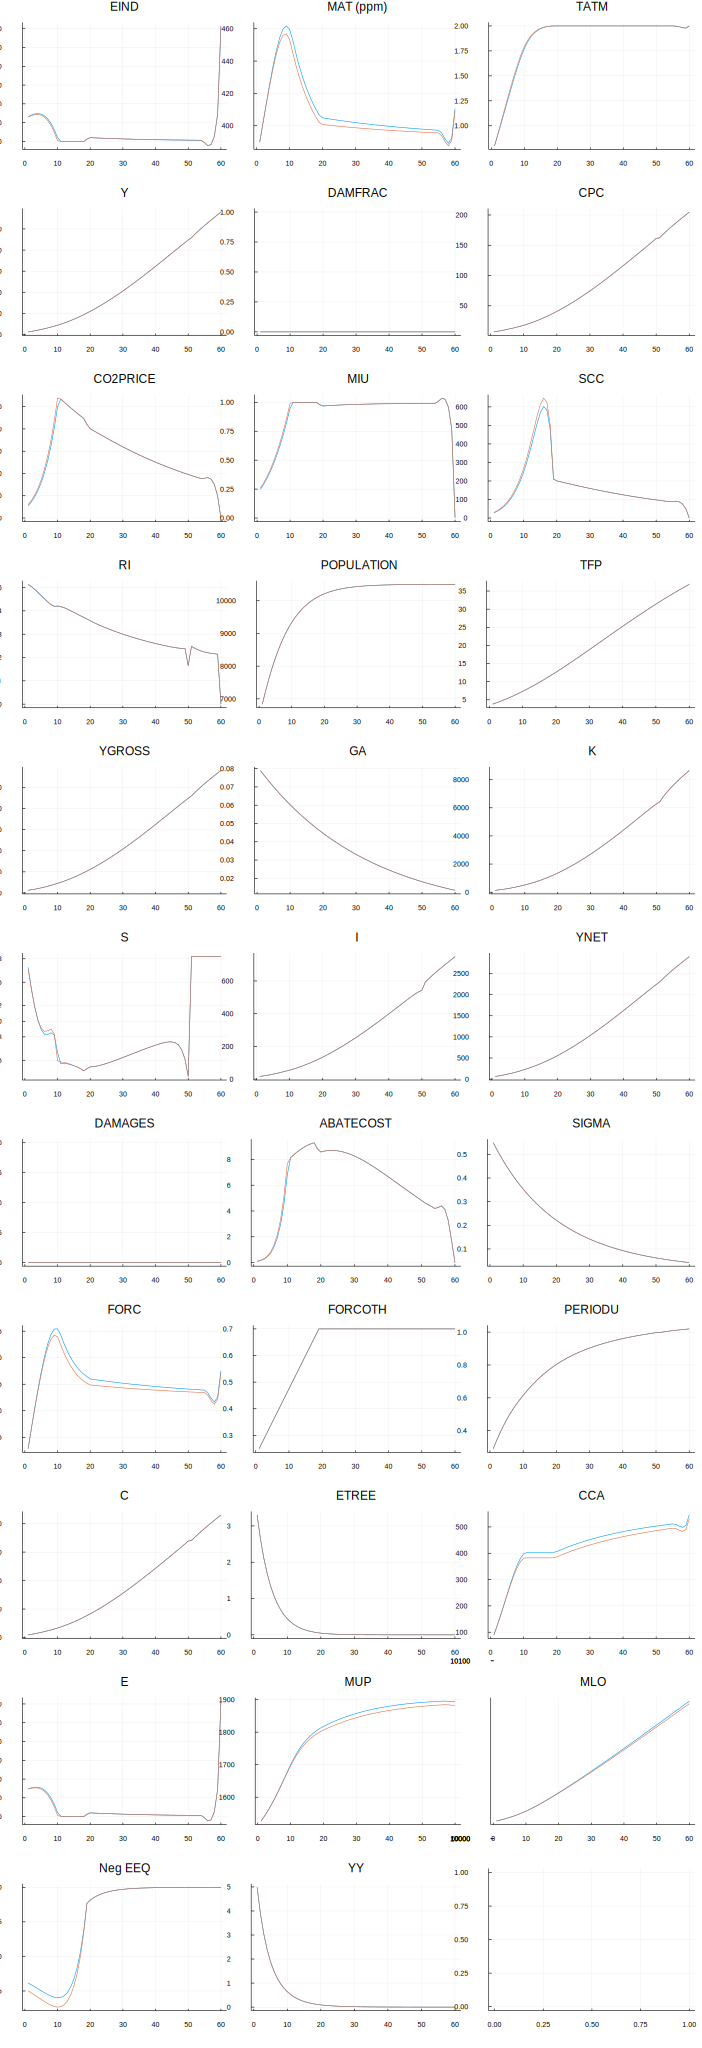

┌ Warning: No strict ticks found
└ @ PlotUtils /home/tim/.julia/packages/PlotUtils/EybJR/src/ticks.jl:168
┌ Warning: No strict ticks found
└ @ PlotUtils /home/tim/.julia/packages/PlotUtils/EybJR/src/ticks.jl:168


In [12]:
plotComparison(lim2, l2params)

CONOPT Utility = `2694.4230194779`

We find a slightly better solution here using HSL MA97.

In [13]:
lim2.results.UTILITY

2696.858644699618

# Stern Scenario

**NOTE:** There is a bug in the GAMS version, which means the `optlrsav` value is not updated in the savings calculation and therefore doesn't actually return the correct Stern scenario.

This comparison is run against a patched version: [d2013RRR_Stern.gms](../GAMS/d2013RRR_Stern.gms), which fixes this issue.

All differences noted in the graphs below are underneath rounding error.

In [14]:
stern = solve(Stern, version)

This is Ipopt version 3.13.0, running with linear solver ma97.

Number of nonzeros in equality constraint Jacobian...:     3914
Number of nonzeros in inequality constraint Jacobian.:      176
Number of nonzeros in Lagrangian Hessian.............:      944

Total number of variables............................:     1545
                     variables with only lower bounds:      536
                variables with lower and upper bounds:      179
                     variables with only upper bounds:       59
Total number of equality constraints.................:     1374
Total number of inequality constraints...............:       59
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       59

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -0.0000000e+00 9.00e+03 1.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0

Num

Stern scenario using v2013R (Rocky Road flavour).
A JuMP Model
Maximization problem with:
Variables: 1561
Objective function type: JuMP.VariableRef
`JuMP.GenericAffExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 655 constraints
`JuMP.GenericQuadExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 240 constraints
`JuMP.VariableRef`-in-`MathOptInterface.EqualTo{Float64}`: 16 constraints
`JuMP.VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 715 constraints
`JuMP.VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 298 constraints
Nonlinear: 538 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Ipopt
Names registered in the model: C, CCA, CEMUTOTPER, CPC, CPRICE, DAMAGES, E, Eind, FORC, I, K, MCABATE, Mᵤₚ, Mₐₜ, Mₗₒ, PERIODU, RI, S, Tₐₜ, Tₗₒ, UTILITY, Y, YGROSS, YNET, Λ, Ω, μ

In [15]:
sparams = loadGAMSResults(version, Stern);

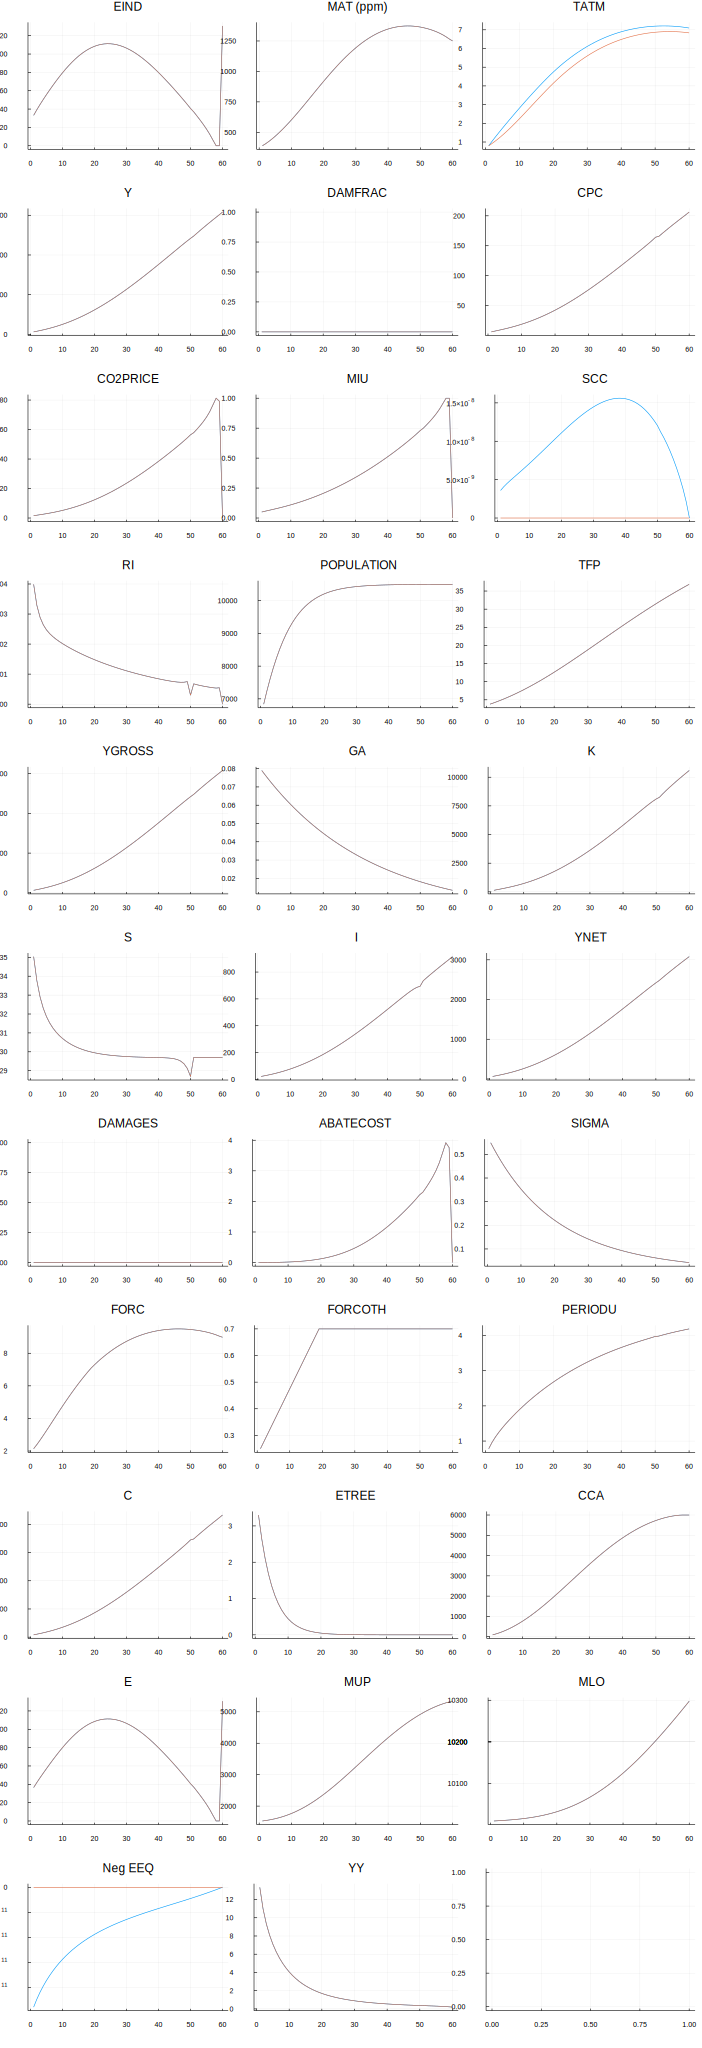

In [16]:
plotComparison(stern, sparams)

CONOPT Utility = `124305.6025535197`

In [17]:
stern.results.UTILITY

124305.60255463522

# Stern Calibrated Scenario

**NOTE:** There is a bug in the GAMS version, which means the `optlrsav` value is not updated in the savings calculation and therefore doesn't actually return the correct Stern scenario.

This comparison is run against a patched version: [d2013RRR_SternCalibrated.gms](../GAMS/d2013RRR_SternCalibrated.gms), which fixes this issue.

In [18]:
sterncal = solve(SternCalibrated, version)

This is Ipopt version 3.13.0, running with linear solver ma97.

Number of nonzeros in equality constraint Jacobian...:     3910
Number of nonzeros in inequality constraint Jacobian.:      176
Number of nonzeros in Lagrangian Hessian.............:      939

Total number of variables............................:     1544
                     variables with only lower bounds:      536
                variables with lower and upper bounds:      178
                     variables with only upper bounds:       59
Total number of equality constraints.................:     1374
Total number of inequality constraints...............:       59
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       59

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -0.0000000e+00 9.00e+03 1.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0

Num

Calibrated Stern scenario using v2013R (Rocky Road flavour).
A JuMP Model
Maximization problem with:
Variables: 1561
Objective function type: JuMP.VariableRef
`JuMP.GenericAffExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 655 constraints
`JuMP.GenericQuadExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 240 constraints
`JuMP.VariableRef`-in-`MathOptInterface.EqualTo{Float64}`: 17 constraints
`JuMP.VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 714 constraints
`JuMP.VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 297 constraints
Nonlinear: 538 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Ipopt
Names registered in the model: C, CCA, CEMUTOTPER, CPC, CPRICE, DAMAGES, E, Eind, FORC, I, K, MCABATE, Mᵤₚ, Mₐₜ, Mₗₒ, PERIODU, RI, S, Tₐₜ, Tₗₒ, UTILITY, Y, YGROSS, YNET, Λ, Ω, μ

In [19]:
scparams = loadGAMSResults(version, SternCalibrated);

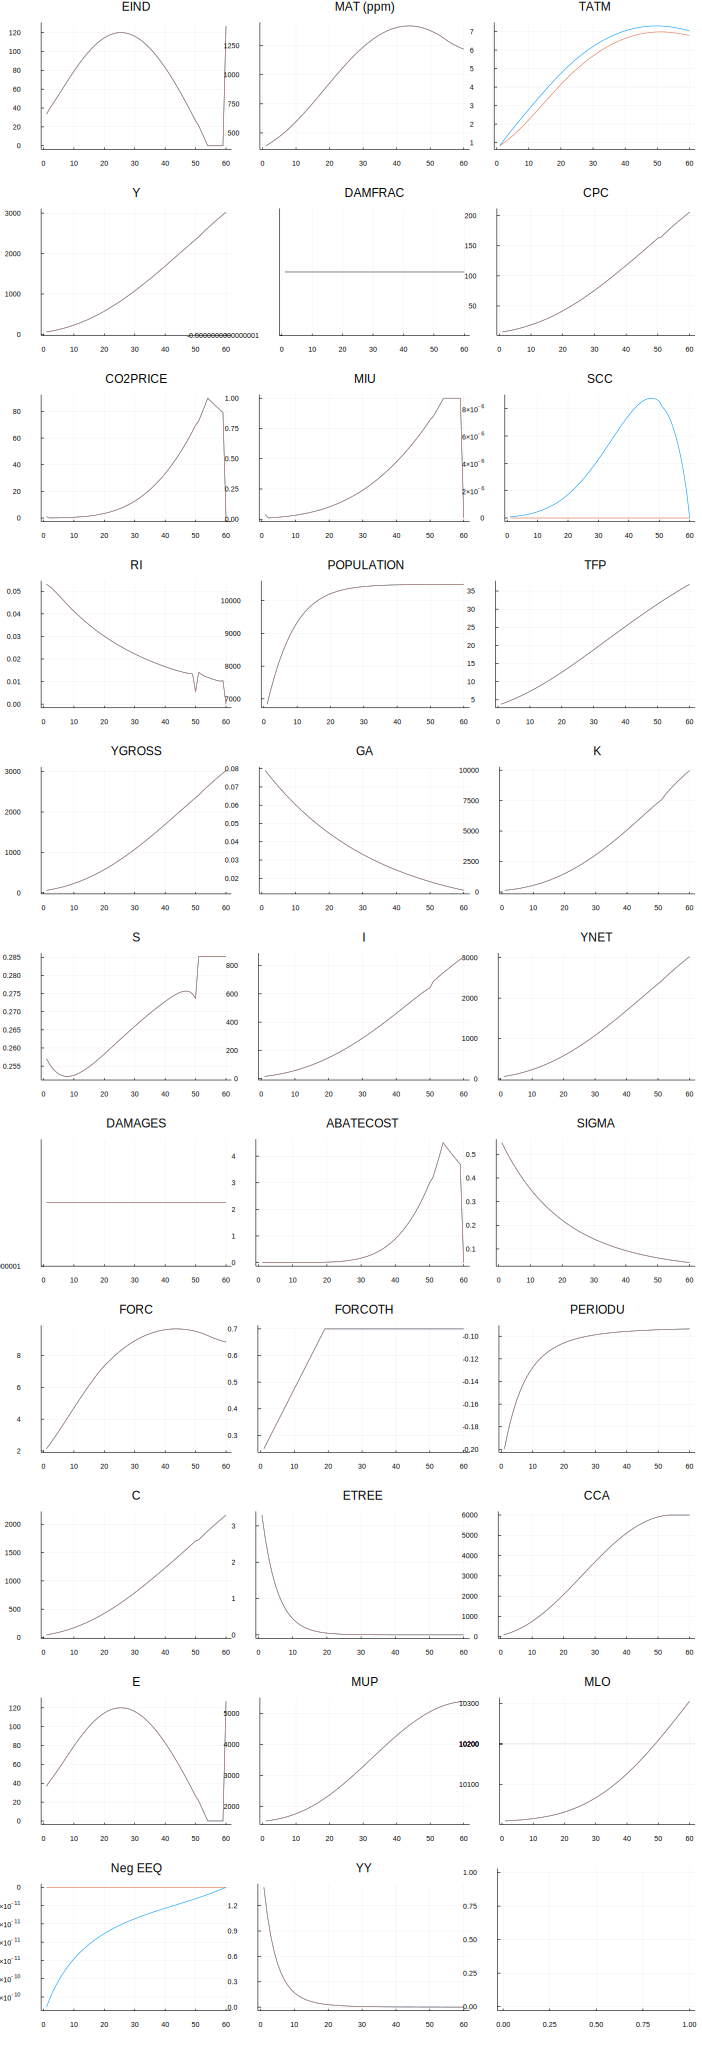

In [20]:
plotComparison(sterncal, scparams)

CONOPT Utility = `-8469.0058598350`

In [21]:
sterncal.results.UTILITY

-8469.005859984465

# Copenhagen Scenario

In [22]:
cop = solve(Copenhagen, version)

This is Ipopt version 3.13.0, running with linear solver ma97.

Number of nonzeros in equality constraint Jacobian...:     3674
Number of nonzeros in inequality constraint Jacobian.:      176
Number of nonzeros in Lagrangian Hessian.............:      644

Total number of variables............................:     1485
                     variables with only lower bounds:      536
                variables with lower and upper bounds:      119
                     variables with only upper bounds:       59
Total number of equality constraints.................:     1374
Total number of inequality constraints...............:       59
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       59

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -0.0000000e+00 9.00e+03 1.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0

Num

Copenhagen participation scenario using v2013R (Rocky Road flavour).
A JuMP Model
Maximization problem with:
Variables: 1561
Objective function type: JuMP.VariableRef
`JuMP.GenericAffExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 655 constraints
`JuMP.GenericQuadExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 240 constraints
`JuMP.VariableRef`-in-`MathOptInterface.EqualTo{Float64}`: 76 constraints
`JuMP.VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 655 constraints
`JuMP.VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 238 constraints
Nonlinear: 538 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Ipopt
Names registered in the model: C, CCA, CEMUTOTPER, CPC, CPRICE, DAMAGES, E, Eind, FORC, I, K, MCABATE, Mᵤₚ, Mₐₜ, Mₗₒ, PERIODU, RI, S, Tₐₜ, Tₗₒ, UTILITY, Y, YGROSS, YNET, Λ, Ω, μ

In [23]:
copparams = loadGAMSResults(version, Copenhagen);

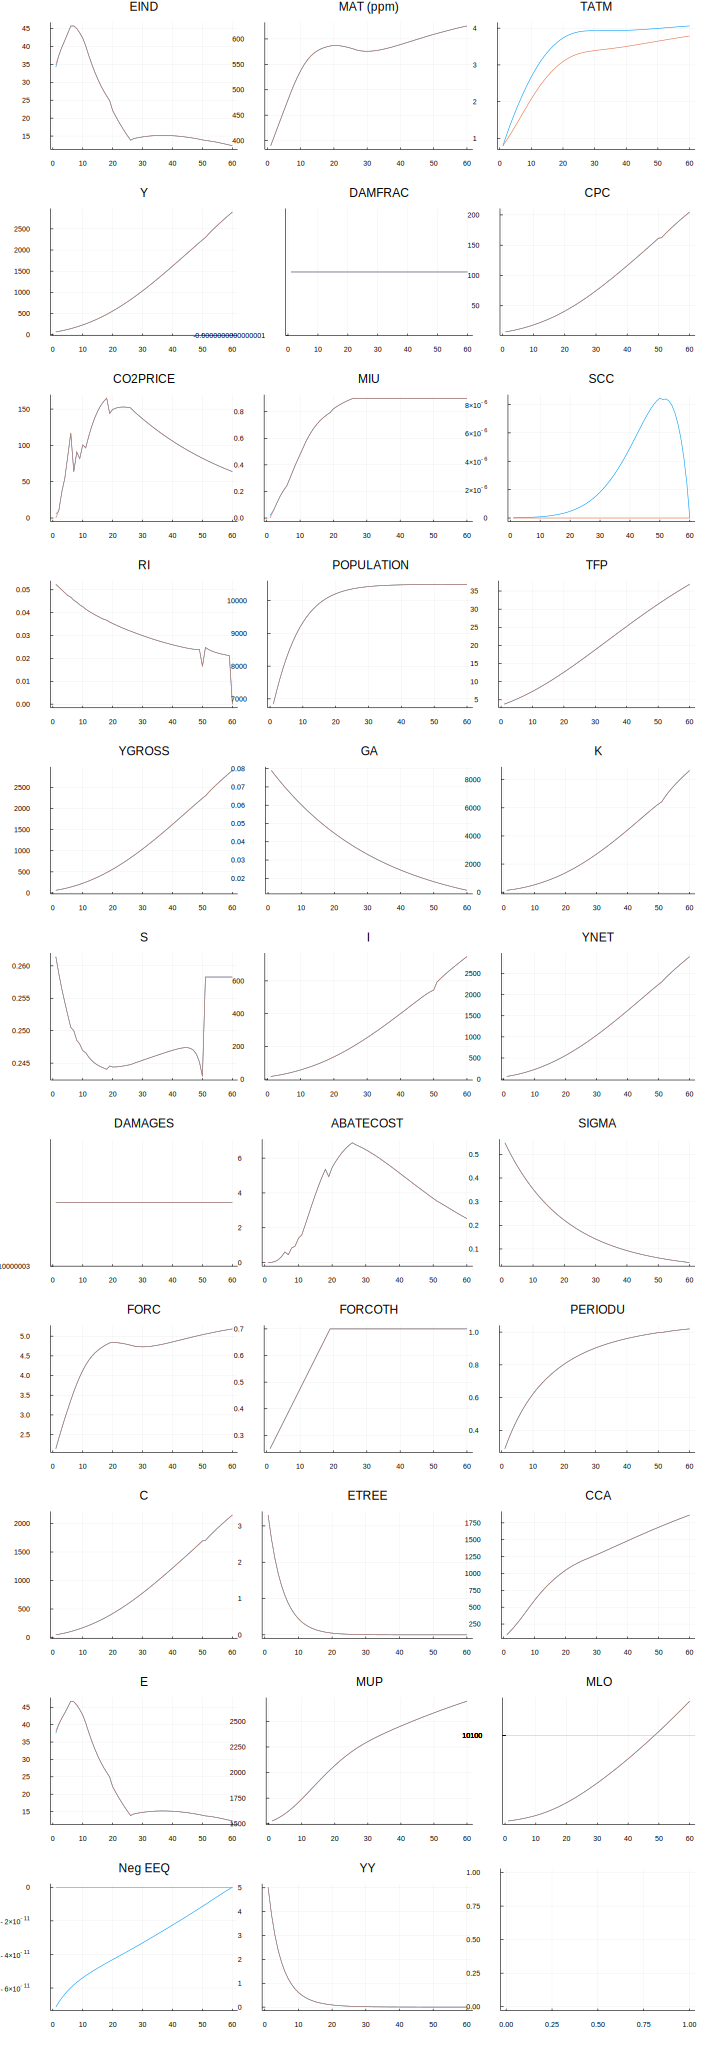

In [24]:
plotComparison(cop, copparams)

CONOPT Objective = `2725.4226463611`

In [25]:
cop.results.UTILITY

2725.4158209963616